In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import analyze_cells_energy as ace
import re
import utils
import itertools
import seaborn as sns
import utils_PLS as upls
import os

In [2]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

In [4]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'Black_wf_WholeBrain'
batch = 'Black_wf_WholeBrain'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
            if os.path.isdir(os.path.join(data_directory, name))]
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_Black_wf_WholeBrain_unfiltered.npy', allow_pickle=True).item()

In [5]:
dict_results_across_mice = upls.reformat_dict_acronym(dict_results=dict_results_across_mice, 
                                                      volumes=volumes)

# Format data for task PLS

In [6]:
data_ncells = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='n_cells')
data_energy = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                   batch=batch, table='energy')
data_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                    batch=batch, table='density')
data_relative_density = upls.format_data_pls(dict_results=dict_results_across_mice, 
                                             batch=batch, table='relative_density')
data_ncells.dropna(inplace=True, axis=1)
data_energy.dropna(inplace=True, axis=1)
data_density.dropna(inplace=True, axis=1)
data_relative_density.dropna(inplace=True, axis=1)
data_ncells.to_csv('./results_pls/'+batch+'_n_cells.csv')
data_energy.to_csv('./results_pls/'+batch+'_energy.csv')
data_density.to_csv('./results_pls/'+batch+'_density.csv')
data_relative_density.to_csv('./results_pls/'+batch+'_relative_density.csv')

# Format data for hierarchy plotting

In [7]:
df_levels = upls.create_df_levels(volumes)

# Apply task PLS for all areas and energy

In [8]:
%%bash
python area_pls.py -i results_pls/Black_wf_WholeBrain_n_cells.csv -o './results_pls/Black_wf_WholeBrain_ncells'

In [9]:
%%bash
python area_pls.py -i results_pls/Black_wf_WholeBrain_energy.csv -o './results_pls/Black_wf_WholeBrain_energy'

In [10]:
%%bash
python area_pls.py -i results_pls/Black_wf_WholeBrain_density.csv -o './results_pls/Black_wf_WholeBrain_density'

In [11]:
%%bash
python area_pls.py -i results_pls/Black_wf_WholeBrain_relative_density.csv -o './results_pls/Black_wf_WholeBrain_relative_density'

# Plot results

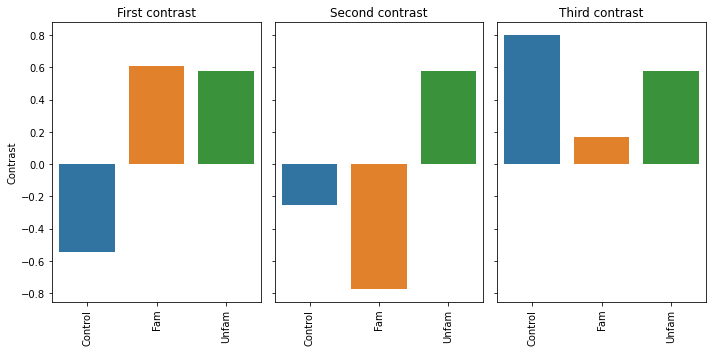

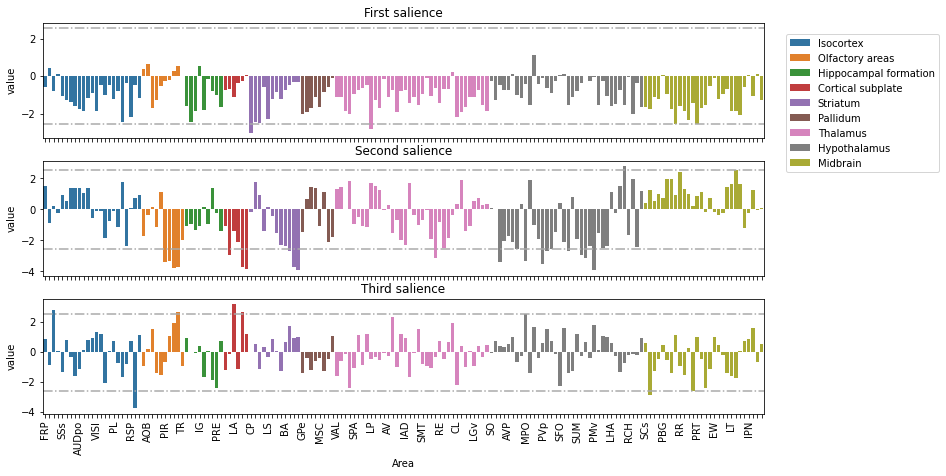

In [12]:
upls.plot_panel_contrasts(batch=batch, variable='ncells')
upls.plot_panel_saliences(batch=batch, variable='ncells', df_levels=df_levels)

# PLS ENERGY

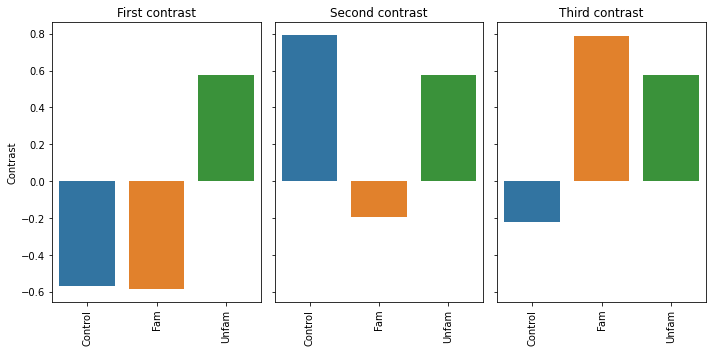

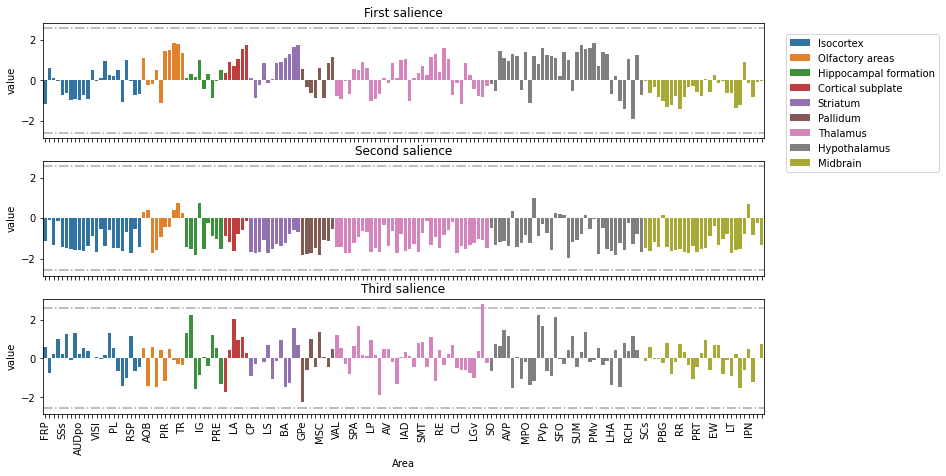

In [13]:
upls.plot_panel_contrasts(batch=batch, variable='energy')
upls.plot_panel_saliences(batch=batch, variable='energy', df_levels=df_levels)

# PLS density

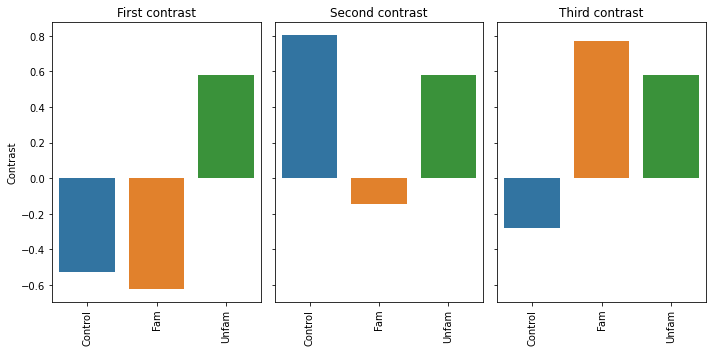

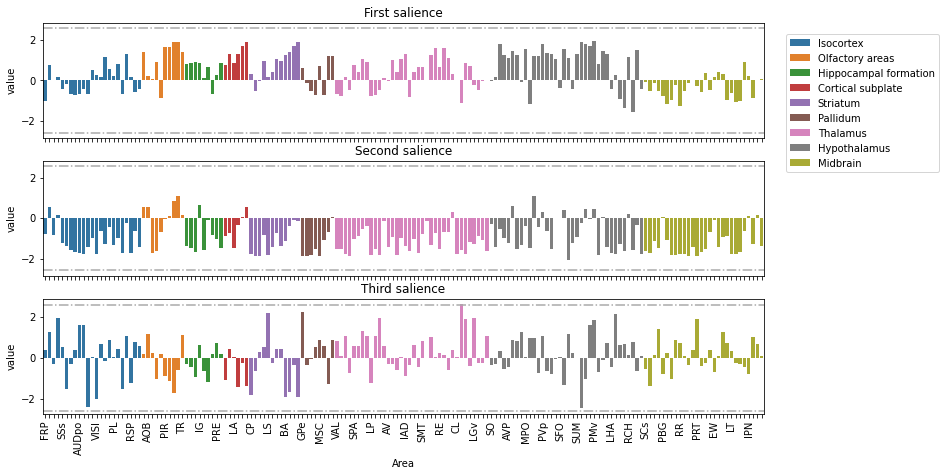

In [14]:
upls.plot_panel_contrasts(batch=batch, variable='density')
upls.plot_panel_saliences(batch=batch, variable='density', df_levels=df_levels)

# PLS relative density

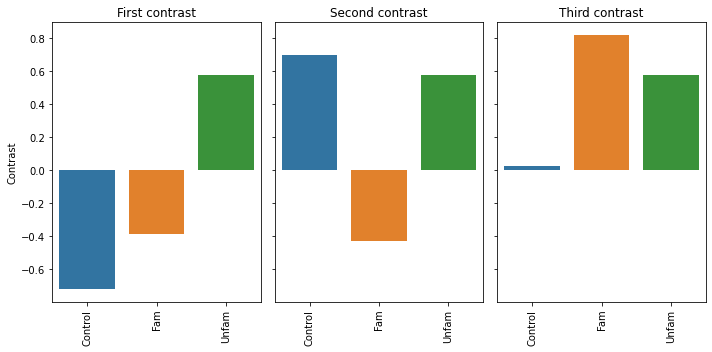

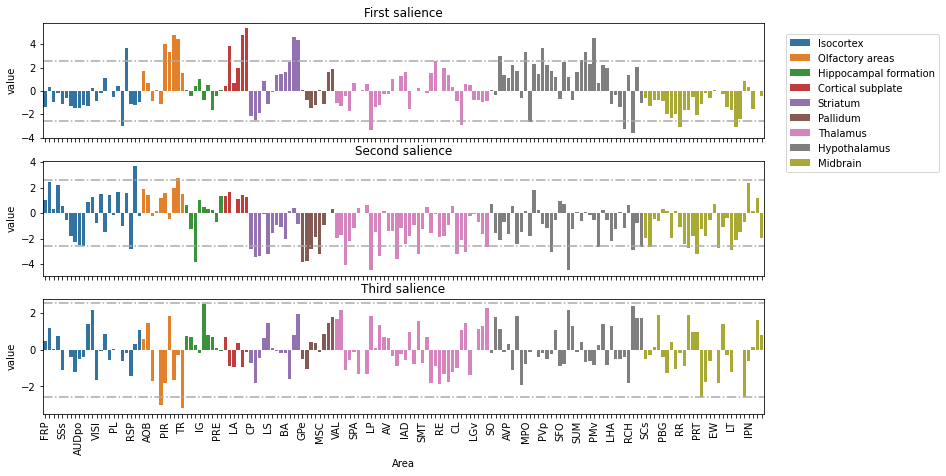

In [15]:
upls.plot_panel_contrasts(batch=batch, variable='relative_density')
upls.plot_panel_saliences(batch=batch, variable='relative_density', df_levels=df_levels)

# Identify area overlap

In [16]:
overlap = {'ncells':[], 'energy':[], 'density':[], 'relative_density':[]}
for variable in overlap.keys():
    overlap[variable] = set(upls.identify_pls_sig_areas(saliences=pd.read_csv(
        './results_pls/'+ batch +'_'+ variable +'_saliences.csv'), 
                                           threshold=2.57, #1.96 --> 95%; 2.57 --> 99%
                                           volumes=volumes))
[len(overlap[key]) for key in overlap.keys()]

[28, 1, 1, 56]

In [17]:
# union between areas significant in all analyses
all_areas = overlap['ncells'].union(overlap['energy']).union(overlap['density']).union(overlap['relative_density'])
# intersection between areas significant in all analyses
intersection = overlap['ncells'].intersection(overlap['energy']).intersection(
    overlap['density']).intersection(overlap['relative_density'])
# filtering
intersection

set()

In [18]:
overlap['ncells']


{'Anterior hypothalamic nucleus',
 'Arcuate hypothalamic nucleus',
 'Basomedial amygdalar nucleus',
 'Caudoputamen',
 'Central amygdalar nucleus',
 'Cortical amygdalar area',
 'Endopiriform nucleus',
 'Inferior colliculus',
 'Intercalated amygdalar nucleus',
 'Lateral amygdalar nucleus',
 'Lateral posterior nucleus of the thalamus',
 'Medial amygdalar nucleus',
 'Medial preoptic area',
 'Medial preoptic nucleus',
 'Nucleus of the lateral olfactory tract',
 'Parasubthalamic nucleus',
 'Parataenial nucleus',
 'Periaqueductal gray',
 'Periventricular hypothalamic nucleus posterior part',
 'Periventricular hypothalamic nucleus preoptic part',
 'Piriform area',
 'Piriform-amygdalar area',
 'Posterior amygdalar nucleus',
 'Rostrolateral visual area',
 'Secondary motor area',
 'Tuberomammillary nucleus',
 'Ventral premammillary nucleus',
 'Ventral tegmental area'}

In [19]:
len(overlap['relative_density'])

56

In [20]:
variable='relative_density'
pls_sig_areas = upls.identify_pls_sig_areas(saliences=pd.read_csv(
        './results_pls/'+ batch +'_'+ variable +'_saliences.csv'), 
                                       threshold=2.57, 
                                       volumes=volumes)
np.save('results_pls/pls_sig_areas_Black_wf_WholeBrain.npy', pls_sig_areas)

In [21]:
len(pls_sig_areas)

56